In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn

C:\Users\Public\Anaconda3\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [11]:
N_0 = 10000
N_1 = 1000
# 病気の人1, 正常な人0
mu_1 = 1
mu_0 = -1
var_1 = 1
var_0 = 1
x = np.random.normal(mu_0, var_0, N_0)
y = np.random.normal(mu_1, var_1, N_1)
theta_seq = np.exp(np.arange(-10, 100, 0.1))
U = []
V = []
for i in range(len(theta_seq)):
    # 病気でない人を病気とみなす
    u = np.sum(stats.norm.pdf(x, mu_1, var_1) / stats.norm.pdf(x, mu_0, var_0) > theta_seq[i]) / N_0
    # 病気の人を病気とみなす
    v = np.sum(stats.norm.pdf(y, mu_1, var_1) / stats.norm.pdf(y, mu_0, var_0) > theta_seq[i]) / N_1
    U.append(u)
    V.append(v)

In [12]:
# 面積を求める
AUC = 0
for i in range(len(theta_seq) - 1):
    AUC = AUC + np.abs(U[i+1] - U[i]) * V[i]

Text(0.3, 0.5, 'AUC = 0.9215241000000003')

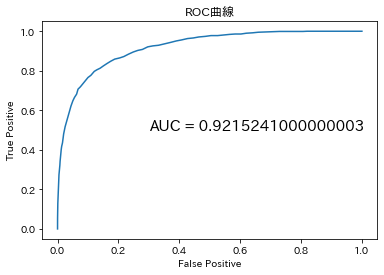

In [13]:
plt.plot(U, V)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC曲線")
plt.text(0.3, 0.5, "AUC = {}".format(AUC), fontsize=15)